In [37]:
import time
import random
import datetime
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add
)

# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf



# 데이터 불러오기

In [38]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sumbmission = pd.read_csv('sample_submission.csv')

## EDA

In [39]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


[]('fashion.PNG')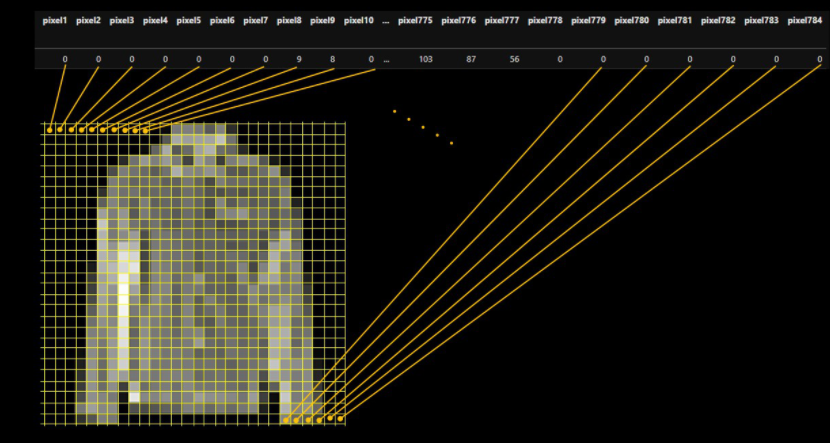

In [40]:
# index, data, label 분리
train_index = train["index"]
train_data = train.iloc[:, 2:]
train_label = train["label"]

test_index = test["index"]
test_data = test.iloc[:, 1:]

In [41]:
# label 비율 확인 
#0 : T-shirt/top
#1 : Trouser
#2 : Pullover
#3 : Dress
#4 : Coat
#5 : Sandal
#6 : Shirt
#7 : Sneaker
#8 : Bag
#9 : Ankle boot
train_label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

2


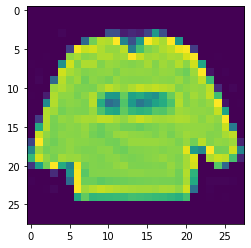

9


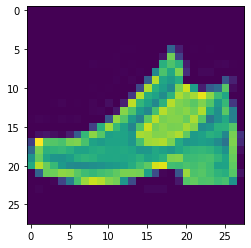

6


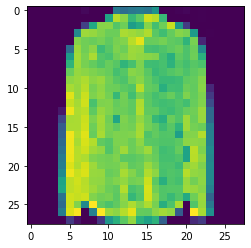

0


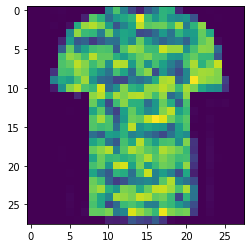

3


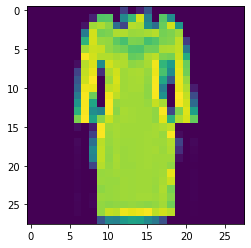

4


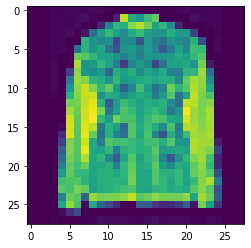

4


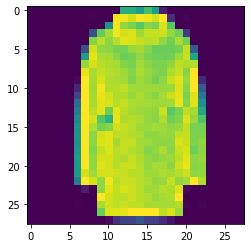

5


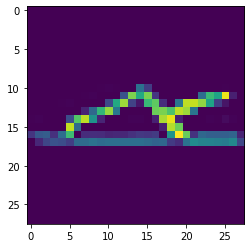

4


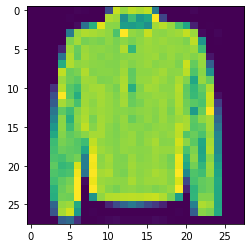

8


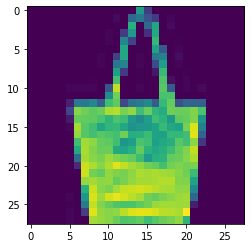

In [42]:

for i in range(10):
    print(train_label.iloc[i])
    plt.imshow(np.array(train_data.iloc[i,:]).reshape(28,28));
    plt.show()

## 전처리

In [45]:
# 데이터 프레임 형식의 데이터를 넘파이 array 형식으로 변환
train_data = np.array(train_data)
X_train = train_data.reshape(-1,28,28,1)

In [46]:
# label을 categori형태의 변수로 변환 
y_train = to_categorical(train["label"].values)

In [47]:
# 데이터 증강을 위한 ImageDataGenerator 정의 

datagen = ImageDataGenerator(
        rescale = 1./255, # 이미지의 스케일 조절 
        rotation_range=10,  # 랜덤하게 사진을 회전시킬 각도 범위(0~180)
        zoom_range = 0.10,  # 램덤하게 사진을 확대할 범위
        horizontal_flip = True, # 랜덤하게 이미지를 수평으로 뒤집음.
        vertical_flip = True, # 랜덤하게 이미지를 수직으로 뒤집음.
        width_shift_range=0.1, #사진을 수평과 수직으로 랜덤하게 평행 이동 시킬 범위
        height_shift_range=0.1)

## 모델링

In [55]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 64)         

In [ ]:
epochs = 10
# Train-Test를 9:1로 분리
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_train, y_train, test_size = 0.1)

history = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    verbose=1
)



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1687/1687 [==============================] - 218s 129ms/step - loss: 0.9732 - accuracy: 0.6340 - val_loss: 61.7272 - val_accuracy: 0.6040
Epoch 2/10
1687/1687 [==============================] - 217s 129ms/step - loss: 0.6896 - accuracy: 0.7460 - val_loss: 86.8434 - val_accuracy: 0.5642
Epoch 3/10
1687/1687 [==============================] - 218s 129ms/step - loss: 0.6084 - accuracy: 0.7788 - val_loss: 50.0712 - val_accuracy: 0.6260
Epoch 4/10
1687/1687 [==============================] - 217s 129ms/step - loss: 0.5646 - accuracy: 0.7987 - val_loss: 61.7411 - val_accuracy: 0.5557
Epoch 5/10
1687/1687 [==============================] - 217s 129ms/step - loss: 0.5344 - accuracy: 0.8065 - val_loss: 87.8124 - val_accuracy: 0.4790
Epoch 6/10
1687/1687 [==============================] - 218s 129ms/step - loss: 0.5174 - accuracy: 0.8137 - val_loss: 80.8786 - val_accuracy: 0.4625
Epoch 7/10
1687/1687 [==============================] - 217s 129ms/step - loss: 0.4964 - accuracy: 0.8223 

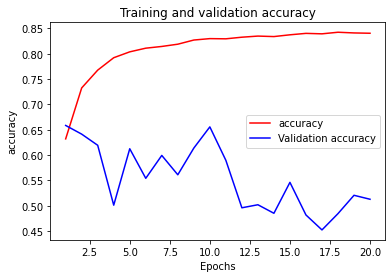

In [50]:
# 코드 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r-', label='accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

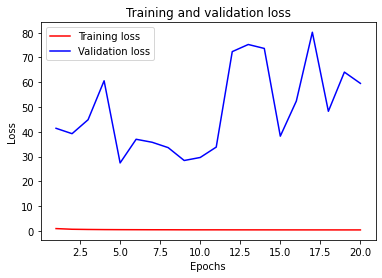

In [51]:
# 코드 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r-', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
X_test = np.array(test_data)
X_test = X_test.reshape(-1,28,28,1)

In [54]:
pred = model.predict(X_test)